In [354]:
import os

# Setup Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'nguynminhkhu123'
os.environ['KAGGLE_KEY'] = 'KGAT_7d1d830678c09d78ca09c6cd897912f6'

DATA_DIR = "Data"
DATA_FILE = os.path.join(DATA_DIR, "Electric_Vehicle_Population_Data.csv")

if os.path.exists(DATA_FILE):
    print("📌 Dữ liệu đã tồn tại — bỏ qua bước tải!")
else:
    try:
        import kaggle
        print("⬇️  Đang tải dữ liệu từ Kaggle...")
        kaggle.api.dataset_download_files(
            'yanghu583/electric-vehicle-population-data-2025',
            path=DATA_DIR,
            unzip=True
        )
        print("✅ Tải thành công!")
        print("📁 Files trong Data:", os.listdir(DATA_DIR))
    except ImportError:
        print("⚠️ Kaggle library chưa cài. Chạy: !pip install kaggle")
    except Exception as e:
        print(f"❌ Lỗi: {e}")


📌 Dữ liệu đã tồn tại — bỏ qua bước tải!


#### Thêm thư viện

In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('./Data/Electric_Vehicle_Population_Data.csv')
df_raw = df.copy()


['WA' 'BC' 'NS' 'KY' 'CA' 'NC' 'DC' 'MI' 'KS' 'OR' 'AL' 'MD' 'IL' 'AZ'
 'NY' 'GA' 'VA' 'WY' 'NE' 'CO' 'UT' 'NV' 'MO' 'TX' 'NJ' 'OK' 'FL' 'RI'
 'TN' 'CT' 'NH' 'MA' 'HI' 'WI' 'OH' 'ME' 'PA' 'AK' 'ID' 'DE' 'IN' 'NM'
 'MN' 'AP' 'MS' 'SC' 'LA' 'GU']
State
WA    250076
CA       144
VA        71
MD        34
TX        29
FL        26
CO        24
IL        17
TN        17
OR        14
NC        14
AZ        14
GA        13
NY        11
NV        11
MO        11
CT        10
MA         9
MI         9
KS         9
AL         8
NJ         8
ID         7
DC         7
HI         6
PA         6
RI         6
OH         5
NE         5
IN         4
NH         4
KY         3
AP         3
SC         3
UT         3
WI         3
MN         2
BC         2
WY         2
NS         1
OK         1
DE         1
ME         1
AK         1
NM         1
MS         1
LA         1
GU         1
Name: count, dtype: int64


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [358]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


### Loại bỏ một số cột ko cần thiết VIN,POSTAL CODE,BASE MSRP,LEGISLATICE DISTRICT,DOL VEHICLE ID,ELECTIRIC UTILITY,2020 CENSUS TRACT

In [359]:
df['DOL Vehicle ID'].nunique()

250659

### Làm đẹp dữ liệu (Cleaning)
Gồm các bước:
- Chuẩn hóa text  
- Chuẩn hóa loại xe (EV Type)  
- Chuẩn hóa hãng xe Make  
- Làm sạch năm Model  



In [ ]:
cols_to_drop = [
    'Base MSRP',
    'DOL Vehicle ID',
    'VIN (1-10)',
    '2020 Census Tract'
]

existing_cols = [c for c in cols_to_drop if c in df.columns]

print(f"Dropping columns: {existing_cols}")
df.drop(columns=existing_cols, inplace=True, errors='ignore')
print(f"Columns removed. Remaining columns: {len(df.columns)}")
print("-----------------------------------")

# =====================================================
# 2. CHUẨN HÓA TEXT
# =====================================================
text_cols = [
    'Make', 
    'Model', 
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'County',
    'City'
]

print("Normalizing text columns...")
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

print("Text normalization done.")
print("-----------------------------------")


# =====================================================
# EV TYPE FIX
# =====================================================
if 'Electric Vehicle Type' in df.columns:
    df['Electric Vehicle Type'] = df['Electric Vehicle Type'].replace({
        'Battery Electric Vehicle (Bev)': 'BEV',
        'Plug-In Hybrid Electric Vehicle (Phev)': 'PHEV',
    })
print("EV Type standardized.")
print("-----------------------------------")


# =====================================================
# Model Year Cleaning
# =====================================================
if 'Model Year' in df.columns:

    before = len(df)
    df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

    # Remove invalid years
    df = df[df['Model Year'] >= 1995]

    df['Model Year'] = df['Model Year'].astype(int)

    after = len(df)
    print(f"Model Year cleaned. Removed: {before - after} rows")
print("-----------------------------------")


# =====================================================
# Make Standardization
# =====================================================
df['Make'] = df.get('Make', pd.Series()).replace({
    'Tesl': 'Tesla',
    'Tes': 'Tesla',
    'Chevy': 'Chevrolet'
})
print("Make column cleaned.")
print("-----------------------------------")



Dropping columns: ['Base MSRP', 'DOL Vehicle ID', 'VIN (1-10)', '2020 Census Tract']
Columns removed. Remaining columns: 13
-----------------------------------
Normalizing text columns...
Text normalization done.
-----------------------------------
EV Type standardized.
-----------------------------------
Model Year cleaned. Removed: 0 rows
-----------------------------------
Make column cleaned.
-----------------------------------
['WA' 'BC' 'NS' 'KY' 'CA' 'NC' 'DC' 'MI' 'KS' 'OR' 'AL' 'MD' 'IL' 'AZ'
 'NY' 'GA' 'VA' 'WY' 'NE' 'CO' 'UT' 'NV' 'MO' 'TX' 'NJ' 'OK' 'FL' 'RI'
 'TN' 'CT' 'NH' 'MA' 'HI' 'WI' 'OH' 'ME' 'PA' 'AK' 'ID' 'DE' 'IN' 'NM'
 'MN' 'AP' 'MS' 'SC' 'LA' 'GU']
State
WA    250076
CA       144
VA        71
MD        34
TX        29
FL        26
CO        24
IL        17
TN        17
OR        14
NC        14
AZ        14
GA        13
NY        11
NV        11
MO        11
CT        10
MA         9
MI         9
KS         9
AL         8
NJ         8
ID         7
DC         7
H

In [361]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,Vehicle Location,Electric Utility
0,Yakima,Granger,WA,98932.0,2022,Tesla,Model S,BEV,Eligibility Unknown As Battery Range Has Not B...,0.0,15.0,POINT (-120.1871 46.33949),PACIFICORP
1,Yakima,Yakima,WA,98902.0,2022,Kia,Ev6,BEV,Eligibility Unknown As Battery Range Has Not B...,0.0,15.0,POINT (-120.52041 46.59751),PACIFICORP
2,Snohomish,Everett,WA,98208.0,2020,Tesla,Model Y,BEV,Clean Alternative Fuel Vehicle Eligible,291.0,44.0,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC
3,Yakima,Yakima,WA,98908.0,2016,Fiat,500,BEV,Clean Alternative Fuel Vehicle Eligible,84.0,14.0,POINT (-120.60199 46.59817),PACIFICORP
4,Kitsap,Bremerton,WA,98312.0,2019,Kia,Niro,PHEV,Not Eligible Due To Low Battery Range,26.0,26.0,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC


In [362]:
df.shape

(250659, 13)

In [363]:
df.isna().sum()

County                                                 0
City                                                   0
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Legislative District                                 583
Vehicle Location                                      14
Electric Utility                                       6
dtype: int64

A very few data points are missing so we can remove them 

In [364]:
df = df.dropna()

In [365]:
county_counts = df.groupby('County')['City'].count().sort_values(ascending=False)

px.bar(
    x=county_counts.index[:10],
    y=county_counts.values[:10],
    labels={'x': 'County Name', 'y': 'Number of Cars'},
    color=county_counts.values[:10],
    title="Top 10 County có số lượng xe EV nhiều nhất"
).show()


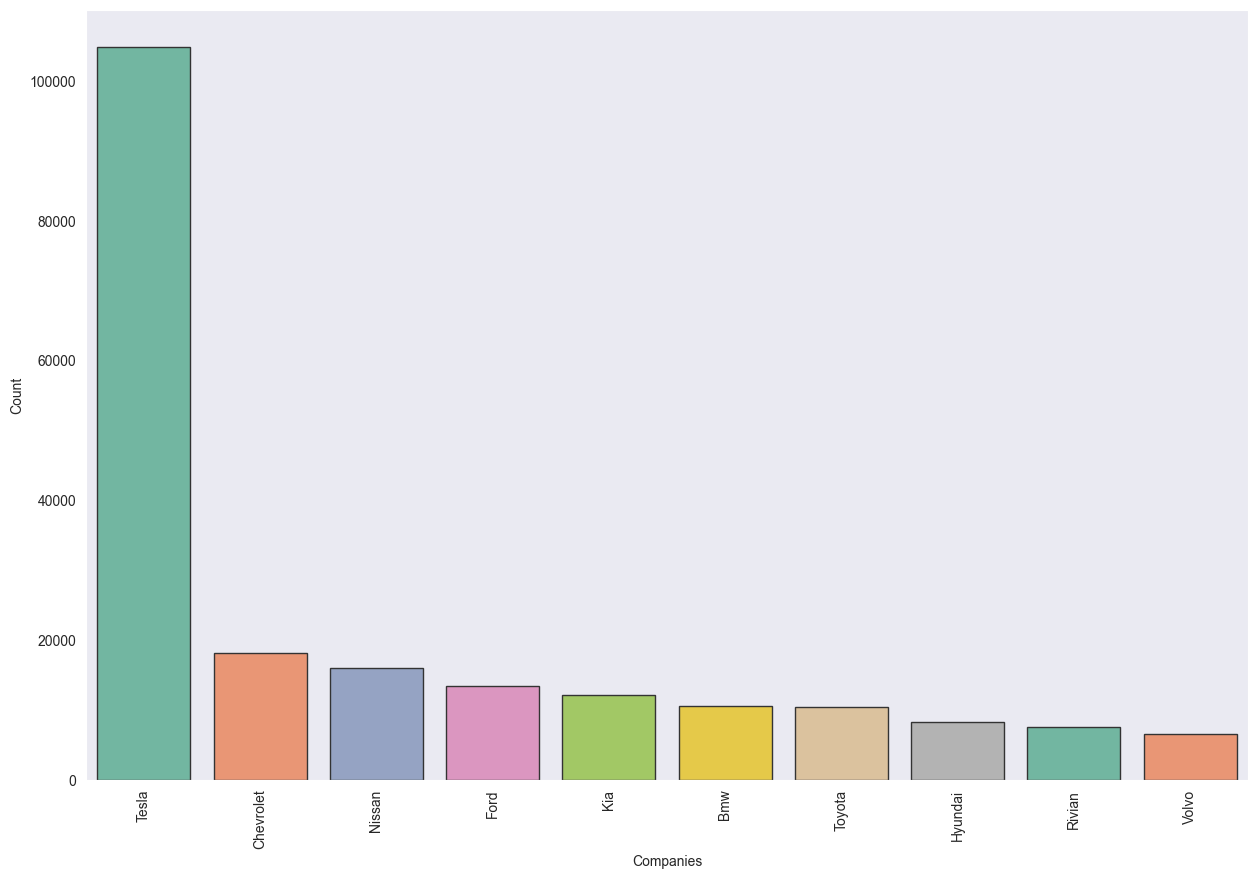

In [366]:
#lets see which company makes most of the electric vehicles
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(15,10))
sns.barplot(x=list(Companies)[:10],
            y=values[:10],edgecolor='.2',palette='Set2',
            hue=list(Companies)[:10],  
            legend=False)              
plt.xticks(rotation=90)
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [367]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

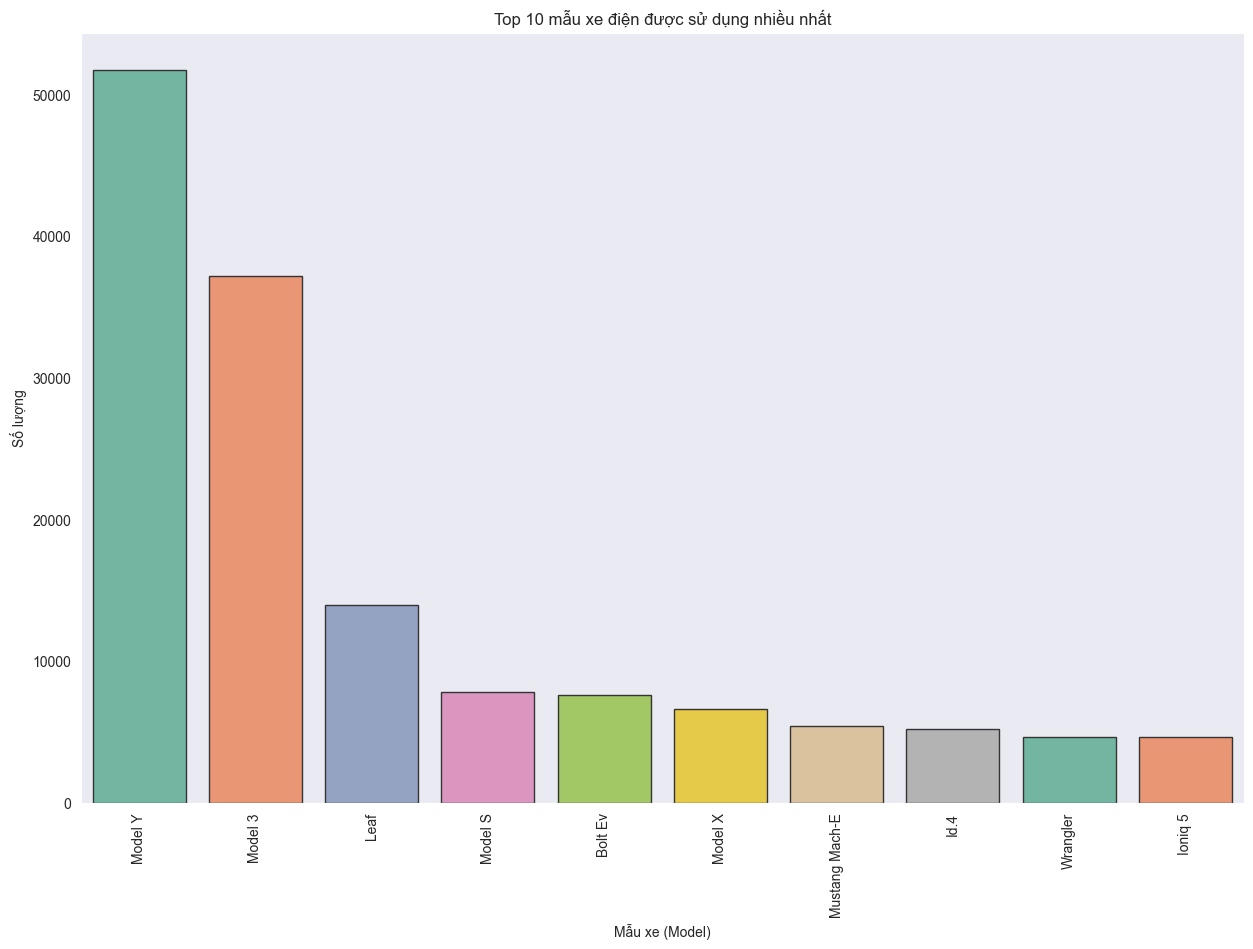

In [368]:
# Top 10 mẫu xe điện được sử dụng nhiều nhất

Models = (
    df.groupby('Model')['City']
      .count()
      .sort_values(ascending=False)
      .index
)

values = (
    df.groupby('Model')['City']
      .count()
      .sort_values(ascending=False)
      .values
)

plt.figure(figsize=(15, 10))
sns.barplot(
    x=list(Models)[:10],
    y=values[:10],
    edgecolor='.2',
    palette='Set2'
)

plt.xticks(rotation=90)
plt.xlabel('Mẫu xe (Model)')
plt.ylabel('Số lượng')
plt.title('Top 10 mẫu xe điện được sử dụng nhiều nhất')
plt.show()


In [369]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for Tesla is -----------> Model Y
Top selling model for Chevrolet is -----------> Bolt Ev
Top selling model for Nissan is -----------> Leaf
Top selling model for Ford is -----------> Mustang Mach-E
Top selling model for Kia is -----------> Niro
Top selling model for Bmw is -----------> X5
Top selling model for Toyota is -----------> Rav4 Prime (Phev)
Top selling model for Hyundai is -----------> Ioniq 5
Top selling model for Rivian is -----------> R1S
Top selling model for Volvo is -----------> Xc90


In [370]:
# Tỷ lệ phần trăm BEV vs PHEV

vehicle_count = (
    df.groupby('Electric Vehicle Type')['County']
      .count()
      .sort_values(ascending=False)
)

fig = px.pie(
    names=vehicle_count.index,
    values=vehicle_count.values,
    title='Tỷ lệ BEV vs PHEV',
    height=400
)

fig.show()


In [371]:
# Tỷ lệ BEV và PHEV của Top 10 hãng xe

for company in top_10_companies:
    # Lọc dữ liệu theo hãng
    data = df[df['Make'] == company]

    # Đếm số lượng từng loại xe
    counts = (
        data.groupby('Electric Vehicle Type')['City']
            .count()
            .sort_values(ascending=False)
    )

    # Vẽ biểu đồ pie
    fig = px.pie(
        names=counts.index,
        values=counts.values,
        title=f"Tỷ lệ BEV vs PHEV của hãng: {company}",
        width=700,
        height=400
    )
    fig.show()


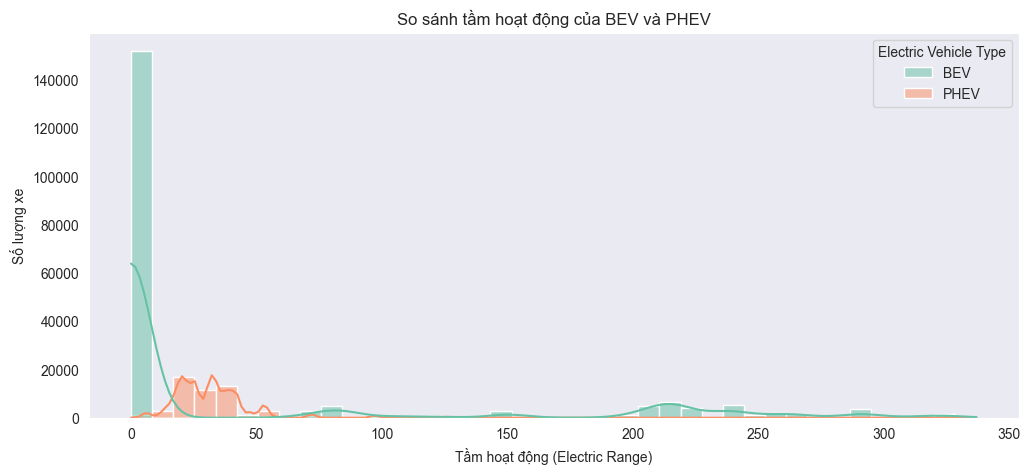

In [372]:
# So sánh tầm hoạt động (Electric Range) giữa BEV và PHEV

plt.figure(figsize=(12, 5))
sns.set_style('dark')

sns.histplot(
    data=df,
    x='Electric Range',
    hue='Electric Vehicle Type',
    kde=True,
    palette='Set2',
    bins=40
)

plt.xlabel("Tầm hoạt động (Electric Range)")
plt.ylabel("Số lượng xe")
plt.title("So sánh tầm hoạt động của BEV và PHEV")
plt.show()


In [373]:
#the data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV

In [374]:
df[df['Electric Range']==0].shape

(151837, 13)

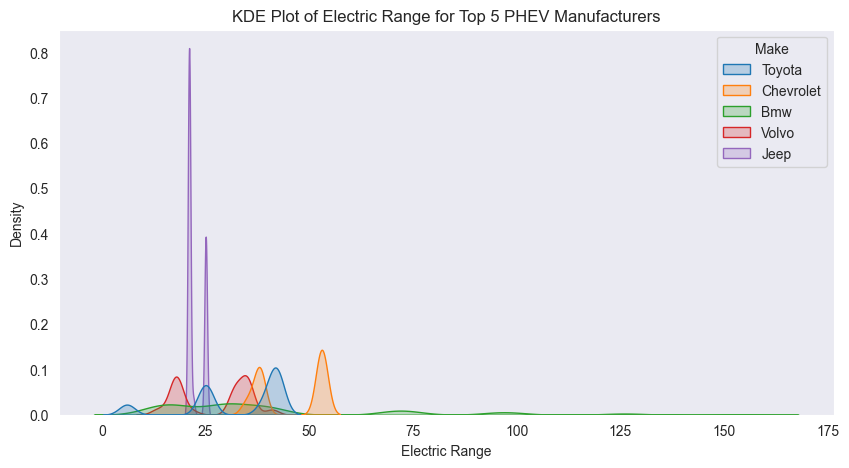

In [375]:
#Dùng data sau chuẩn hóa
data_phev = df[df['Electric Vehicle Type'] == 'PHEV']

# Loại bỏ NA trong Electric Range
data_phev = data_phev.dropna(subset=['Electric Range'])

# Lấy top 5 hãng PHEV
companies = (
    data_phev.groupby('Make')['City']
    .count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter theo top 5 hãng
data_phev = data_phev[data_phev['Make'].isin(companies)]

plt.figure(figsize=(10,5))
sns.kdeplot(
    data=data_phev,
    x='Electric Range',
    hue='Make',
    fill=True,
    common_norm=False
)
plt.title("KDE Plot of Electric Range for Top 5 PHEV Manufacturers")
plt.show()


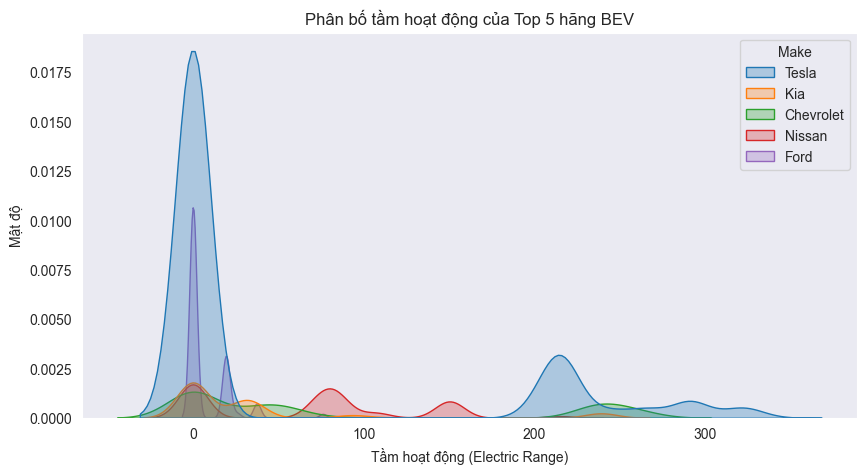

In [376]:
# Lọc BEV
data_bev = df[df['Electric Vehicle Type'] != 'Plug-in Hybrid Electric Vehicle (PHEV)'].copy()

# Top 5 hãng BEV
top_5_bev_companies = (
    data_bev.groupby('Make')['City']
            .count()
            .sort_values(ascending=False)
            .index[:5]
)

# Gán nhãn BEV top 5 (không gây lỗi)
data_bev['is_top5'] = data_bev['Make'].apply(lambda x: 1 if x in top_5_bev_companies else 0)

# Lọc chỉ giữ top 5
data_top5 = data_bev[data_bev['is_top5'] == 1]

# Vẽ KDE Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=data_top5,
    x='Electric Range',
    hue='Make',
    fill=True,
    alpha=0.3
)

plt.xlabel("Tầm hoạt động (Electric Range)")
plt.ylabel("Mật độ")
plt.title("Phân bố tầm hoạt động của Top 5 hãng BEV")
plt.show()


In [377]:
top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]

In [378]:
top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]

In [379]:
top_10_vehicles

['Model Y',
 'Model 3',
 'Leaf',
 'Model S',
 'Bolt Ev',
 'Model X',
 'Mustang Mach-E',
 'Id.4',
 'Wrangler',
 'Ioniq 5']

In [380]:
top_10_range

array(['Model S', 'Model 3', 'Macan', 'Model X', 'Model Y', 'Bolt Ev',
       'Kona', 'Roadster', 'Niro', 'I-Pace'], dtype=object)

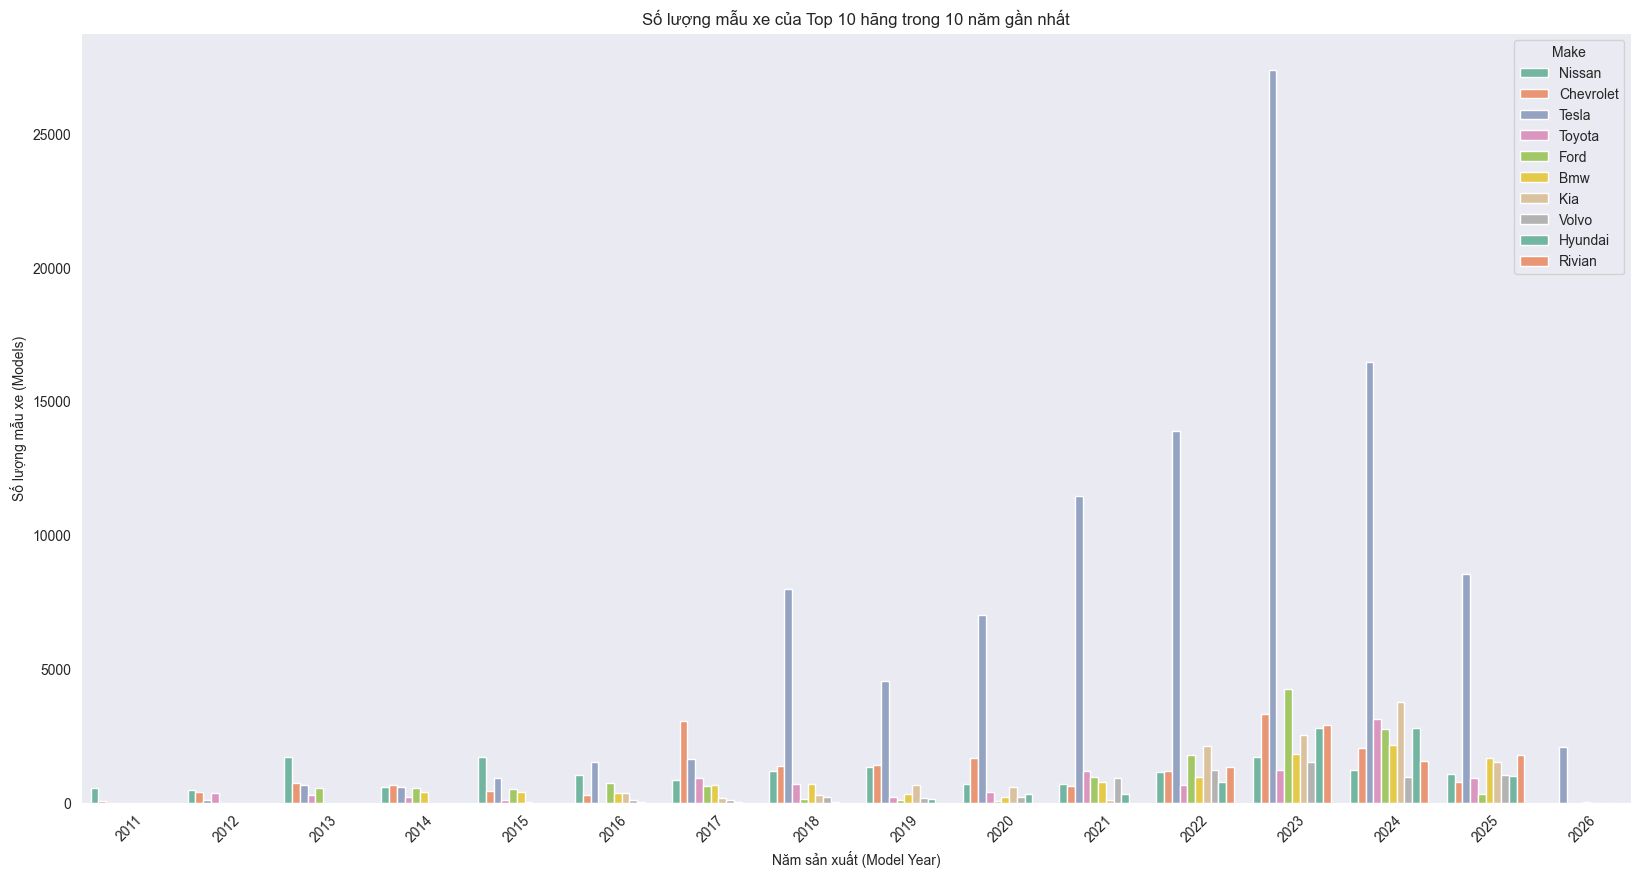

In [381]:
data = df.copy()

# Gán nhãn để xác định hãng trong top 10
data['is_top10'] = data['Make'].isin(top_10_companies)

# Lọc chỉ giữ top 10
data = data[data['is_top10'] == True]

# Lọc 10 năm gần nhất (Model Year >= 2011)
data = data[data['Model Year'] >= 2011]

# Vẽ biểu đồ
plt.figure(figsize=(20, 10))
sns.countplot(
    data=data,
    x='Model Year',
    hue='Make',
    palette='Set2'
)

plt.xticks(rotation=45)
plt.xlabel("Năm sản xuất (Model Year)")
plt.ylabel("Số lượng mẫu xe (Models)")
plt.title("Số lượng mẫu xe của Top 10 hãng trong 10 năm gần nhất")
plt.show()


In [382]:
# 1.Bang nào đang có số lượng xe TESLA nhiều nhất?
# 2.Mẫu xe thuộc năm sản xuất nào của TESLA đang được sử dụng nhiều nhất?

data_TESLA = df[df['Make']=='Tesla']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]

<Axes: >

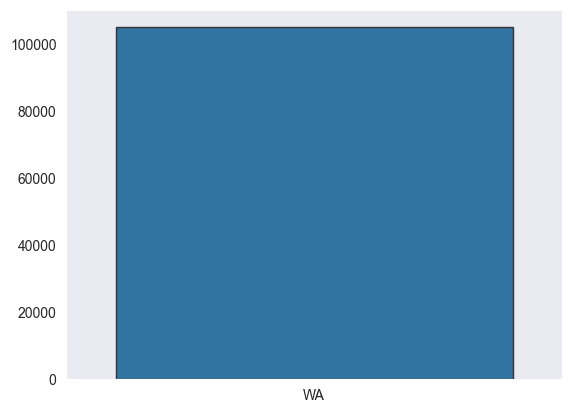

In [383]:
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')

In [384]:
values

[np.int64(104974)]

In [385]:
#Most of the Tesla vehicles are from 'WA' state

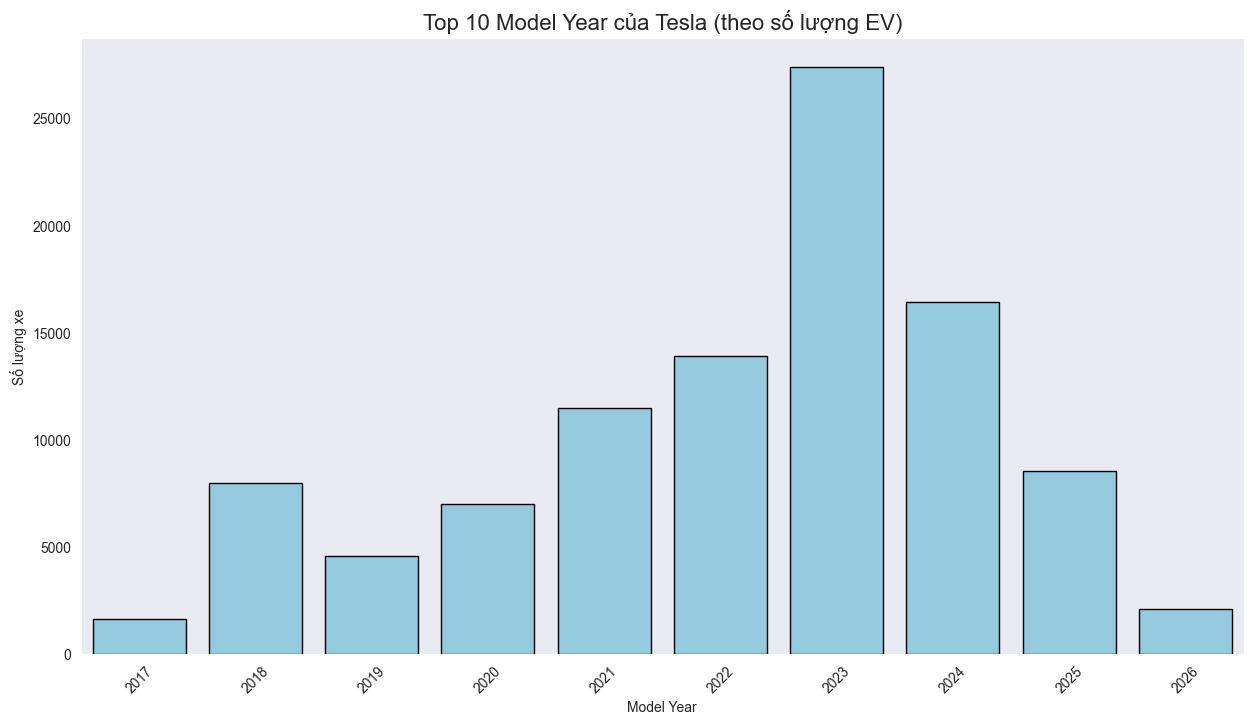

In [386]:
plt.figure(figsize=(15,8))

# Lọc Tesla
data_TESLA = df[df['Make'] == 'Tesla']

# Đếm số lượng theo Model Year
year_counts = data_TESLA['Model Year'].value_counts().sort_values(ascending=False)

# Lấy top 10
top_years = year_counts.head(10)

sns.barplot(x=top_years.index, y=top_years.values, edgecolor='black', color='skyblue')

plt.title("Top 10 Model Year của Tesla (theo số lượng EV)", fontsize=16)
plt.xlabel("Model Year")
plt.ylabel("Số lượng xe")
plt.xticks(rotation=45)
plt.show()


Phần lớn các mẫu xe do Tesla bán ra đều thuộc năm 2022.

(20.0, 60.0)

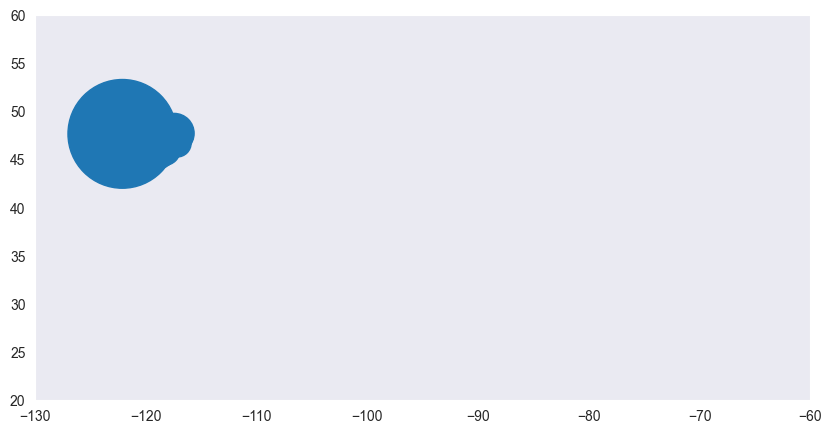

In [387]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)


In [388]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))

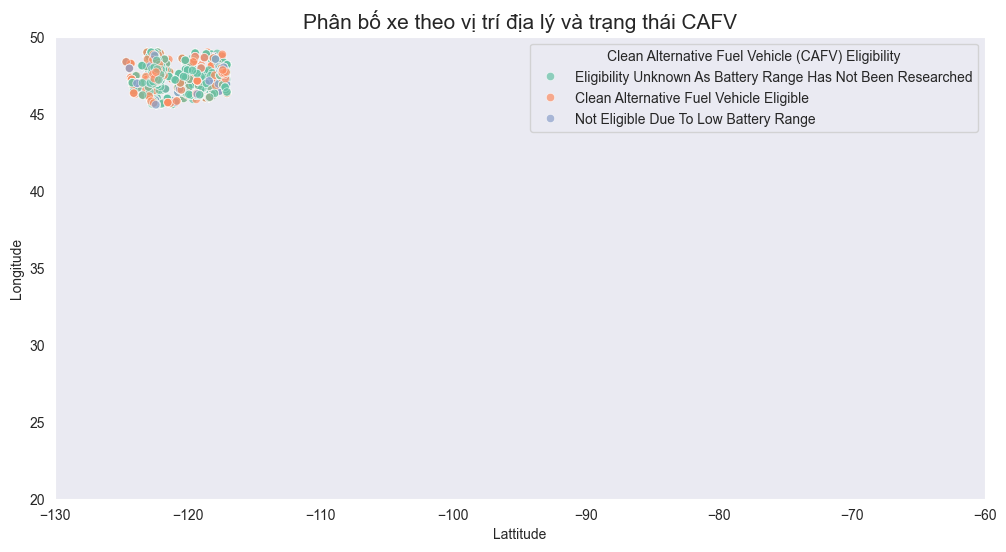

In [389]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    x='Lattitude',
    y='Longitude',
    data=df,
    hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    palette='Set2',
    alpha=0.7
)

plt.title("Phân bố xe theo vị trí địa lý và trạng thái CAFV", fontsize=15)
plt.xlim(-130, -60)
plt.ylim(20, 50)

plt.show()


(20.0, 50.0)

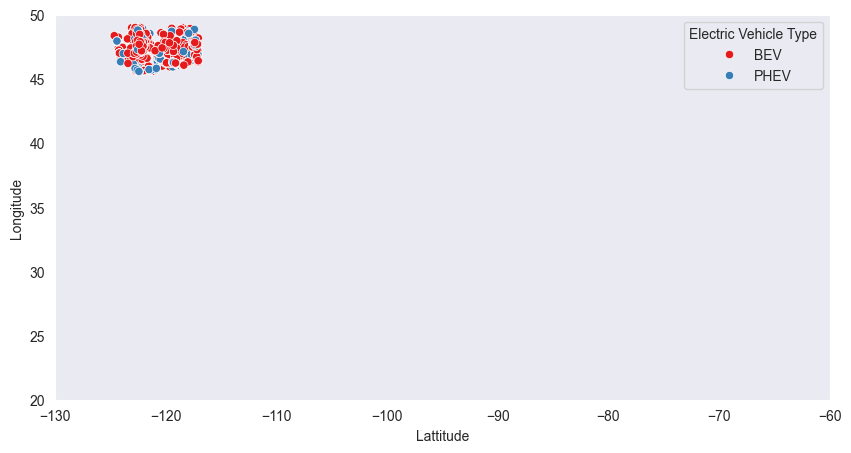

In [390]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [391]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [392]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])

In [393]:
data = data.reset_index()

In [394]:
data.columns = ['State','Count']

In [395]:
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="greens", 
                    scope="usa")

fig.show()

## Xu hướng phát triển xe điện tại bang Washington (2026–2030)

Chúng tôi xây dựng dự báo 5 năm (2026–2030) cho số lượng đăng ký xe theo hạt (county), hãng xe (make) và mẫu xe (model) bằng hai phương pháp chuỗi thời gian cùng cơ chế dự phòng:

- **ARIMA** – mô hình tự hồi quy – trung bình trượt tích hợp, phù hợp cho việc kéo dài xu hướng ngắn hạn.  
- **Theta** – phương pháp dự báo xu hướng ổn định, hoạt động hiệu quả trên các chuỗi dữ liệu ngắn.  
- Khi các mô hình thống kê gặp khó khăn do chuỗi dữ liệu quá thưa, chúng tôi sử dụng phương án dự phòng gồm xu hướng tuyến tính bảo thủ hoặc SES + drift.  
  Dự báo bắt đầu từ năm 2026 và các biểu đồ được trình bày với trục độc lập nhằm đảm bảo khả năng quan sát rõ ràng.

### Kết quả nổi bật từ bộ dự báo:

- **Theo từng hạt (County):**  
  Tăng trưởng mạnh nhất tiếp tục đến từ King County, với đà tăng ổn định tại Snohomish và Pierce.  
  Các hạt nông thôn tăng trưởng từ mức nền thấp hơn và thể hiện độ biến động lớn hơn.

- **Theo hãng xe (Make):**  
  Tesla duy trì vị thế dẫn đầu, trong khi Ford, Hyundai và Kia ghi nhận mức tăng ổn định khi danh mục xe điện của họ mở rộng.  
  Thị trường vẫn tập trung vào nhóm dẫn đầu nhưng có xu hướng đa dạng hóa theo thời gian.

- **Theo mẫu xe (Model):**  
  Top 10 mẫu xe (theo tổng số lượng sở hữu) tiếp tục giữ vị trí thống trị, đặc biệt là các dòng CUV cỡ nhỏ như Model Y, Mach-E, Ioniq 5/6 đang cho thấy đà tăng trưởng mạnh mẽ nhất.

In [396]:
import warnings
warnings.filterwarnings('ignore')

from typing import List

# Thử import các mô hình dự báo (ARIMA, Theta, SES);
# nếu không cài đặt thì gán None để fallback tự xử lý.
try:
    from statsmodels.tsa.arima.model import ARIMA
except Exception:
    ARIMA = None

try:
    from statsmodels.tsa.forecasting.theta import ThetaModel
except Exception:
    ThetaModel = None

try:
    from statsmodels.tsa.holtwinters import SimpleExpSmoothing
except Exception:
    SimpleExpSmoothing = None

# Kiểm tra các cột bắt buộc phải có cho dự báo
required_cols = {'County', 'Make', 'Model', 'Model Year'}
missing_cols = required_cols - set(df.columns)
if missing_cols:
    raise ValueError(f"Các cột thiếu cho dự báo: {missing_cols}")

# Chuẩn hóa năm sản xuất thành số nguyên và loại bỏ giá trị không hợp lệ
df['Model Year'] = df['Model Year'].astype(int)

# Hàm tính tổng xe theo từng năm cho một nhóm (county / make / model)
def compute_yearly_counts(group_col: str) -> pd.DataFrame:
    counts = (
        df.groupby([group_col, 'Model Year'])
          .size()
          .reset_index(name='Count')
    )
    return counts

# Chọn ra top N nhóm có dữ liệu nhiều nhất (tính theo tổng hoặc theo năm mới nhất)
def select_top_groups(forecast_df: pd.DataFrame, group_col: str, top_n: int = 12, mode: str = 'latest') -> list:
    actuals = forecast_df[forecast_df['Type'] == 'Actual']
    if actuals.empty:
        return []
    if mode == 'total':
        totals = actuals.groupby(group_col)['Count'].sum().sort_values(ascending=False)
    else:
        latest_year = actuals['Year'].max()
        totals = (actuals[actuals['Year'] == latest_year]
                  .groupby(group_col)['Count'].sum()
                  .sort_values(ascending=False))
    return list(totals.head(top_n).index)

# Xây dựng chuỗi liên tục theo năm (fill missing = 0)
def build_continuous_series(sub: pd.DataFrame, year_col: str = 'Model Year', value_col: str = 'Count') -> pd.Series:
    years = np.arange(sub[year_col].min(), sub[year_col].max() + 1)
    series = sub.set_index(year_col)[value_col].reindex(years, fill_value=0)
    series.index.name = 'Year'
    return series.astype(float)

# Dự báo ARIMA cho từng nhóm, có fallback nếu mô hình không hội tụ
def forecast_arima_per_group(counts: pd.DataFrame, group_col: str, horizon: int = 3) -> pd.DataFrame:
    records: List[dict] = []
    for group_value, sub in counts.groupby(group_col):
        if sub['Model Year'].nunique() < 2:
            continue
        sub_sorted = sub.sort_values('Model Year')
        series = build_continuous_series(sub_sorted)
        last_year = int(series.index.max())

        # Ghi nhận dữ liệu thực tế (Actuals)
        for year, cnt in series.items():
            records.append({group_col: group_value, 'Year': int(year), 'Count': float(cnt), 'Type': 'Actual'})

        # Thử chạy ARIMA
        preds = None
        if ARIMA is not None and len(series) >= 3:
            try:
                order = (0, 1, 1) if len(series) >= 4 else (1, 0, 0)
                model = ARIMA(series, order=order, enforce_stationarity=False, enforce_invertibility=False)
                fit = model.fit(method_kwargs={"warn_convergence": False})
                preds = fit.forecast(steps=horizon)
            except Exception:
                preds = None

        # Fallback tuyến tính nếu ARIMA lỗi
        if preds is None:
            x = series.index.values
            y = series.values
            a, b = np.polyfit(x, y, 1)
            preds = pd.Series([max(0.0, a * (last_year + k) + b)
                               for k in range(1, horizon + 1)],
                              index=[last_year + k for k in range(1, horizon + 1)])

        # Lưu dự báo
        for year, cnt in preds.items():
            records.append({group_col: group_value, 'Year': int(year),
                            'Count': float(max(0.0, cnt)), 'Type': 'ARIMA'})

    return pd.DataFrame.from_records(records)

# Dự báo Theta cho từng nhóm, có fallback SES hoặc tuyến tính
def forecast_theta_per_group(counts: pd.DataFrame, group_col: str, horizon: int = 3) -> pd.DataFrame:
    records: List[dict] = []
    for group_value, sub in counts.groupby(group_col):
        if sub['Model Year'].nunique() < 2:
            continue
        sub_sorted = sub.sort_values('Model Year')
        series = build_continuous_series(sub_sorted)
        last_year = int(series.index.max())

        preds = None
        # Thử chạy Theta
        if ThetaModel is not None and len(series) >= 3:
            try:
                tm = ThetaModel(series)
                res = tm.fit()
                preds = res.forecast(horizon)
            except Exception:
                preds = None

        # Fallback SES + drift nếu Theta lỗi
        if preds is None:
            if SimpleExpSmoothing is not None and len(series) >= 2:
                try:
                    ses_fit = SimpleExpSmoothing(series).fit(optimized=True)
                    ses_fc = ses_fit.forecast(horizon)
                    t = np.arange(len(series))
                    slope, intercept = np.polyfit(t, series.values, 1)
                    drift = slope
                    preds = ses_fc + drift * np.arange(1, horizon + 1)
                except Exception:
                    preds = None

        # Fallback tuyến tính cuối cùng
        if preds is None:
            x = series.index.values
            y = series.values
            a, b = np.polyfit(x, y, 1)
            preds = pd.Series([max(0.0, a * (last_year + k) + b)
                               for k in range(1, horizon + 1)],
                              index=[last_year + k for k in range(1, horizon + 1)])

        # Lưu dự báo
        for year, cnt in preds.items():
            records.append({group_col: group_value, 'Year': int(year),
                            'Count': float(max(0.0, cnt)), 'Type': 'Theta'})

    # Thêm dữ liệu thực tế
    actuals = []
    for group_value, sub in counts.groupby(group_col):
        series = build_continuous_series(sub)
        for year, cnt in series.items():
            actuals.append({group_col: group_value, 'Year': int(year), 'Count': float(cnt), 'Type': 'Actual'})

    df_actuals = pd.DataFrame(actuals)
    return pd.DataFrame.from_records(records).append(df_actuals, ignore_index=True)

# Kết hợp dự báo ARIMA + Theta + dữ liệu thực tế
def combine_forecasts_arima_theta(counts: pd.DataFrame, group_col: str, horizon: int = 3) -> pd.DataFrame:
    arima_df = forecast_arima_per_group(counts, group_col, horizon)
    theta_df = forecast_theta_per_group(counts, group_col, horizon)
    combined = pd.concat([arima_df, theta_df], ignore_index=True)
    combined = combined.drop_duplicates(subset=[group_col, 'Year', 'Type'])
    return combined

# Xây dựng chuỗi dữ liệu liên tục từ năm đầu đến 2025 dưới dạng PeriodIndex để Statsmodels hiểu tần suất
def build_continuous_series_fixed_start(sub: pd.DataFrame, year_col: str = 'Model Year', value_col: str = 'Count') -> pd.Series:
    if sub.empty:
        return pd.Series(dtype=float)
    min_year = int(sub[year_col].min())
    max_hist_year = int(min(sub[year_col].max(), FORECAST_START_YEAR - 1))
    years = np.arange(min_year, max_hist_year + 1)
    series = sub.set_index(year_col)[value_col].reindex(years, fill_value=0).astype(float)
    series.index = pd.PeriodIndex(series.index.astype(int), freq='Y')
    series.index.name = 'Year'
    return series

# Dự báo đầy đủ ARIMA + Theta cho từng nhóm, đảm bảo bắt đầu từ 2026
def forecast_arima_theta_fixed_start(counts: pd.DataFrame, group_col: str) -> pd.DataFrame:
    records: List[dict] = []
    for group_value, sub in counts.groupby(group_col):
        if sub['Model Year'].nunique() < 2:
            continue
        sub_sorted = sub.sort_values('Model Year')
        series = build_continuous_series_fixed_start(sub_sorted)
        if series.empty:
            continue

        # Lưu dữ liệu thực tế (đến 2025)
        for pyear, cnt in series.items():
            year_int = int(getattr(pyear, 'year', int(str(pyear))))
            records.append({group_col: group_value, 'Year': year_int,
                            'Count': float(cnt), 'Type': 'Actual'})

        steps = FORECAST_HORIZON

        # ARIMA có fallback
        preds_arima = None
        if ARIMA is not None and len(series) >= 3:
            try:
                order = (0, 1, 1) if len(series) >= 4 else (1, 0, 0)
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    model = ARIMA(series, order=order, enforce_stationarity=False, enforce_invertibility=False)
                    fit = model.fit(method_kwargs={"warn_convergence": False})
                converged = True
                try:
                    converged = bool(getattr(fit, 'mle_retvals', {}).get('converged', True))
                except Exception:
                    pass
                if converged:
                    preds_arima = fit.forecast(steps=steps)
            except Exception:
                preds_arima = None

        # Fallback ARIMA → tuyến tính nếu ARIMA lỗi
        if preds_arima is None:
            x = np.array([int(ix.year) for ix in series.index])
            y = series.values
            a, b = np.polyfit(x, y, 1)
            preds_arima = pd.Series(
                [max(0.0, a * (FORECAST_START_YEAR + k) + b)
                 for k in range(0, FORECAST_HORIZON)],
                index=pd.PeriodIndex(
                    [FORECAST_START_YEAR + k for k in range(0, FORECAST_HORIZON)],
                    freq='Y'
                )
            )

        # Theta có fallback SES hoặc tuyến tính
        preds_theta = None
        if ThetaModel is not None and len(series) >= 3:
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    tm = ThetaModel(series)
                    res = tm.fit()
                    preds_theta = res.forecast(steps)
            except Exception:
                preds_theta = None

        if preds_theta is None:
            if SimpleExpSmoothing is not None and len(series) >= 2:
                try:
                    ses_fit = SimpleExpSmoothing(series).fit(optimized=True)
                    ses_fc = ses_fit.forecast(FORECAST_HORIZON)
                    t = np.arange(len(series))
                    slope, intercept = np.polyfit(t, series.values, 1)
                    drift = slope
                    preds_theta = ses_fc + drift * np.arange(1, FORECAST_HORIZON + 1)
                    preds_theta.index = pd.PeriodIndex(
                        [FORECAST_START_YEAR + k for k in range(0, FORECAST_HORIZON)],
                        freq='Y'
                    )
                except Exception:
                    preds_theta = None

        if preds_theta is None:
            x = np.array([int(ix.year) for ix in series.index])
            y = series.values
            a, b = np.polyfit(x, y, 1)
            preds_theta = pd.Series(
                [max(0.0, a * (FORECAST_START_YEAR + k) + b)
                 for k in range(0, FORECAST_HORIZON)],
                index=pd.PeriodIndex(
                    [FORECAST_START_YEAR + k for k in range(0, FORECAST_HORIZON)],
                    freq='Y'
                )
            )

        # Căn chỉnh chỉ số dự báo về đúng các năm 2026–2028 (hoặc 2026–2030)
        target_idx = pd.PeriodIndex(
            [FORECAST_START_YEAR + i for i in range(0, FORECAST_HORIZON)],
            freq='Y'
        )
        try:
            preds_arima = preds_arima.reindex(target_idx)
        except Exception:
            preds_arima.index = target_idx

        try:
            preds_theta = preds_theta.reindex(target_idx)
        except Exception:
            preds_theta.index = target_idx

        # Lưu kết quả dự báo
        for pyear, cnt in preds_arima.items():
            year_int = int(getattr(pyear, 'year', int(str(pyear))))
            records.append({
                group_col: group_value,
                'Year': year_int,
                'Count': float(max(0.0, cnt)),
                'Type': 'ARIMA'
            })
        for pyear, cnt in preds_theta.items():
            year_int = int(getattr(pyear, 'year', int(str(pyear))))
            records.append({
                group_col: group_value,
                'Year': year_int,
                'Count': float(max(0.0, cnt)),
                'Type': 'Theta'
            })

    return pd.DataFrame.from_records(records)

In [397]:
# Mở rộng dự báo thành 5 năm (2026–2030) và vẽ lại biểu đồ
FORECAST_START_YEAR = 2026
FORECAST_HORIZON = 5
FORECAST_END_YEAR = FORECAST_START_YEAR + FORECAST_HORIZON - 1

# Định nghĩa lại các hàm vẽ biểu đồ để tự động dùng horizon động trong tiêu đề
import plotly.express as px

def plot_actual_vs_forecast_local(
    forecast_df: pd.DataFrame,
    group_col: str,
    top_n: int = 12,
    title_prefix: str = "",
    top_select_mode: str = 'latest'  # 'latest' = dựa trên năm mới nhất, 'total' = tổng toàn chuỗi
):
    # Lấy dữ liệu thực tế
    actuals = forecast_df[forecast_df['Type'] == 'Actual']
    if actuals.empty:
        return
    
    # Chọn nhóm đứng đầu theo mode (latest hoặc total)
    if top_select_mode == 'total':
        totals = actuals.groupby(group_col)['Count'].sum().sort_values(ascending=False)
    else:
        latest_actual_year = actuals['Year'].max()
        totals = (actuals[actuals['Year'] == latest_actual_year]
                  .groupby(group_col)['Count']
                  .sum()
                  .sort_values(ascending=False))

    top_groups = list(totals.head(top_n).index)

    # Lọc dữ liệu chỉ gồm top nhóm
    dsub = forecast_df[forecast_df[group_col].isin(top_groups)].copy()
    dsub['Line'] = dsub['Type']           # kiểu dữ liệu (Actual, ARIMA, Theta)
    dsub['Group'] = dsub[group_col]       # tên nhóm để facet

    # Tạo tiêu đề
    title = (f"{title_prefix} Thực tế vs Dự báo {FORECAST_START_YEAR}–{FORECAST_END_YEAR} "
             f"(ARIMA & Theta) theo {group_col}")

    # Vẽ biểu đồ đường dạng facet
    fig = px.line(
        dsub,
        x='Year', y='Count',
        color='Line',
        facet_col='Group',
        facet_col_wrap=4,
        markers=True,
        title=title
    )
    fig.update_layout(width=1600, height=800)
    fig.show()


def plot_individual_group_forecasts(forecast_df: pd.DataFrame, group_col: str, groups: list, title_prefix: str = ""):
    # Vẽ dự báo cho từng nhóm 1 biểu đồ riêng
    for grp in groups:
        d = forecast_df[forecast_df[group_col] == grp].copy()
        if d.empty:
            continue
        d['Line'] = d['Type']

        # Lấy range năm thực tế
        actual_years = d.loc[d['Type'] == 'Actual', 'Year']
        x_min = int(actual_years.min()) if not actual_years.empty else int(d['Year'].min())
        x_max = FORECAST_END_YEAR

        # Range trục Y
        y_max = float(d['Count'].max()) if not d['Count'].empty else 0.0
        y_range = [0, max(1.0, y_max * 1.1)]

        # Tiêu đề biểu đồ
        title = (f"{title_prefix} {grp} — Thực tế vs Dự báo {FORECAST_START_YEAR}–{FORECAST_END_YEAR} "
                 f"(ARIMA & Theta)")

        # Vẽ biểu đồ
        fig = px.line(
            d,
            x='Year', y='Count',
            color='Line',
            markers=True,
            title=title
        )
        fig.update_layout(width=1000, height=450)
        fig.update_xaxes(range=[x_min, x_max])
        fig.update_yaxes(range=y_range)
        fig.show()

# Tính lại số lượng theo từng năm (County, Make, Model)
counts_county = compute_yearly_counts('County')
counts_make = compute_yearly_counts('Make')
counts_model = compute_yearly_counts('Model')

# Tạo dự báo ARIMA + Theta với horizon 2026–2030
fc_county_2630 = forecast_arima_theta_fixed_start(counts_county, 'County')
fc_make_2630 = forecast_arima_theta_fixed_start(counts_make, 'Make')
fc_model_2630 = forecast_arima_theta_fixed_start(counts_model, 'Model')

# Biểu đồ dạng facet
plot_actual_vs_forecast_local(fc_county_2630, 'County', top_n=12, title_prefix='County:')
plot_actual_vs_forecast_local(fc_make_2630, 'Make', top_n=12, title_prefix='Hãng xe:')
plot_actual_vs_forecast_local(fc_model_2630, 'Model', top_n=10, title_prefix='Model:', top_select_mode='total')

# Lấy top groups để vẽ biểu đồ riêng lẻ
top_counties = select_top_groups(fc_county_2630, 'County', top_n=12, mode='latest')
top_makes = select_top_groups(fc_make_2630, 'Make', top_n=12, mode='latest')
top_models = select_top_groups(fc_model_2630, 'Model', top_n=10, mode='total')

# Biểu đồ riêng cho từng nhóm
plot_individual_group_forecasts(fc_county_2630, 'County', top_counties, title_prefix='County:')
plot_individual_group_forecasts(fc_make_2630, 'Make', top_makes, title_prefix='Hãng xe:')
plot_individual_group_forecasts(fc_model_2630, 'Model', top_models, title_prefix='Model:')